In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data['target'] = pd.DataFrame(data = iris.target)   
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
X = data.drop('target', axis=1)
y = data[['target']]

X_array = np.array(X)
y_array = np.array(y)

In [3]:
# порогове значення дисперсії

from sklearn.feature_selection import VarianceThreshold

X_new = VarianceThreshold(threshold=0.6)
X_new.fit_transform(X)

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [4]:
# select best

from sklearn.feature_selection import SelectKBest, f_classif

X_new = SelectKBest(f_classif, k=3).fit_transform(X_array, y_array.ravel())
print('X', X.shape)
print('X_new', X_new.shape)

X (150, 4)
X_new (150, 3)


In [5]:
# select from model  

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sfm_selector = SelectFromModel(estimator=LogisticRegression(), threshold = 1.9)
sfm_selector.fit(X_array, y_array.ravel())

X.columns[sfm_selector.get_support()]

C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [6]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
new_X = pca.fit_transform(X_array)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

Text(0.5, 1.0, 'PCA_1x2')

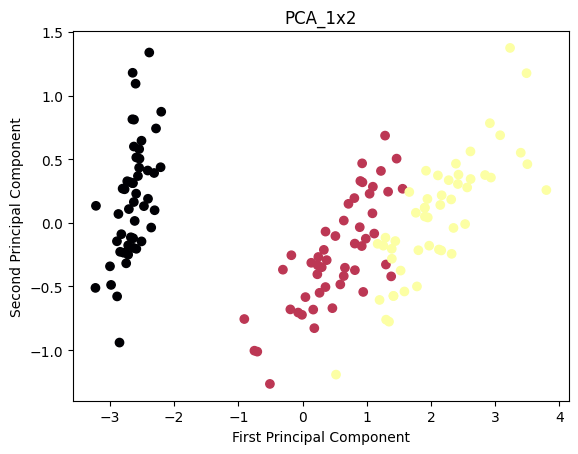

In [17]:
plt.scatter(new_X[:, 0], new_X[:, 1], c = data['target'], cmap ='inferno')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA_1x2')

Text(0.5, 1.0, 'PCA_1x3')

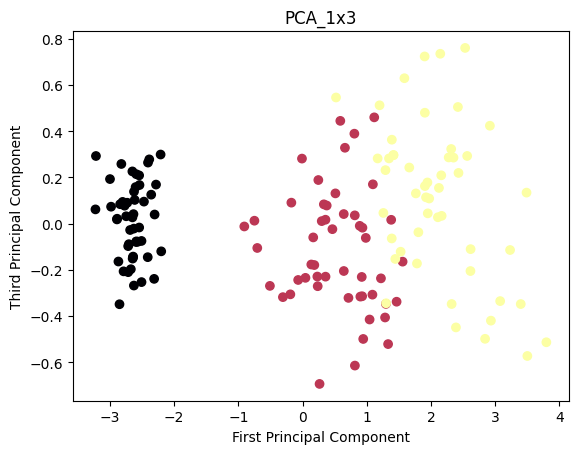

In [18]:
# plt.figure(figsize =(8, 6))
plt.scatter(new_X[:, 0], new_X[:, 2], c = data['target'], cmap ='inferno')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA_1x3')

Text(0.5, 1.0, 'PCA_2x3')

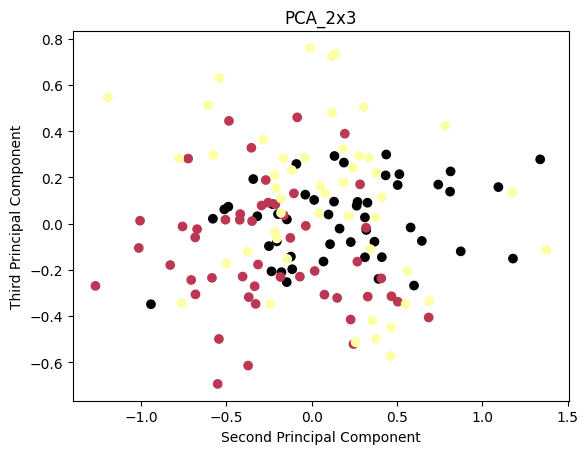

In [31]:
# plt.figure(figsize =(8, 6))
plt.scatter(new_X[:, 1], new_X[:, 2], c = data['target'], cmap ='inferno')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA_2x3')

In [10]:
# Singular Value Decomposition

from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components=2)
X_new = svd.fit_transform(X_array)
X_new

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

In [11]:
# Linear discriminant analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
data_new = lda.fit_transform(X_array, y_array.ravel())
data_new

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

Text(0.5, 1.0, 'LDA')

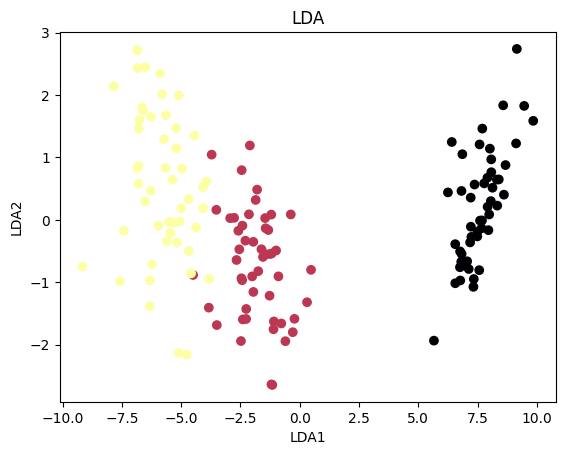

In [30]:
plt.scatter(data_new[:,0], data_new[:,1], c=y_array , cmap='inferno')
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('LDA')